<img width="400" src="https://nomeroff.net.ua/images/logo/nomeroff_net.svg" alt="Nomeroff Net. Automatic numberplate recognition system" align="left"/>

## The example demonstrates license plate number detection.

Before runing this demo, please download models from [https://nomeroff.net.ua/models/](https://nomeroff.net.ua/models/) to **./models/** directory. 

In [1]:
# Import all necessary libraries.
import os
import cv2
import numpy as np
import sys
import json
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

# specify the path to Mask_RCNN if you placed it outside Nomeroff-net project
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')

sys.path.append(NOMEROFF_NET_DIR)

Also you may use .pb models for options detectors or OCR detectors. 
More about conversion and preparing for inference withit https://github.com/ria-com/nomeroff-net/blob/master/examples/inference_convert.ipynb.

In [2]:
# Import license plate recognition tools.
from NomeroffNet import  filters
from NomeroffNet import  RectDetector
from NomeroffNet import  TextDetector
from NomeroffNet import  OptionsDetector
from NomeroffNet import  Detector
from NomeroffNet import  textPostprocessing
from NomeroffNet import  textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel("latest")

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector({
    "eu_ua_2004_2015": {
        "for_regions": ["eu_ua_2015", "eu_ua_2004"],
        "model_path": "latest"
    },
    "eu_ua_1995": {
        "for_regions": ["eu_ua_1995"],
        "model_path": "latest"
    },
    "eu": {
        "for_regions": ["eu"],
        "model_path": "latest"
    },
    "ru": {
        "for_regions": ["ru", "eu-ua-fake-lnr", "eu-ua-fake-dnr"],
        "model_path": "latest" 
    },
    "kz": {
        "for_regions": ["kz"],
        "model_path": "latest"
    },
    "ge": {
        "for_regions": ["ge"],
        "model_path": "latest"
    }
})

Using TensorFlow backend.
W0731 18:42:15.327078 140014006011520 deprecation_wrapper.py:119] From /mnt/data/var/www/html2/js/nomeroff-net_2/NomeroffNet/Detector.py:14: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0731 18:42:15.328454 140014006011520 deprecation_wrapper.py:119] From /mnt/data/var/www/html2/js/nomeroff-net_2/NomeroffNet/Detector.py:16: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0731 18:42:15.595323 140014006011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 18:42:15.597953 140014006011520 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 18:42:15.601009 140014006011520 deprecati

images/38913124-38913124_8.jpg


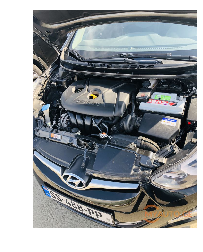

[[[530.15193069 441.33106626]
  [594.60987703 451.24767339]
  [589.59634987 476.31530919]
  [527.47094592 468.14091394]]

 [[ 71.02870175 506.57552882]
  [115.2682818  512.89546883]
  [112.70699837 534.66637803]
  [ 68.958511   525.20724562]]

 [[327.42164009 836.89023884]
  [340.8494037  894.43779718]
  [108.53921701 798.48358963]
  [102.70318142 763.46737611]]]


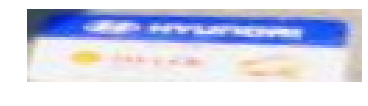

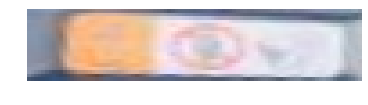

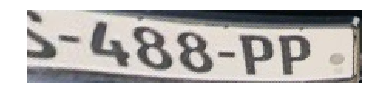

['xx_unknown', 'xx_unknown', 'ge']
[0, 0, 1]
['', '', 'S88AP']
images/39133400-39133400_6.jpg


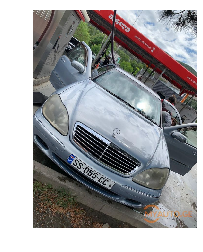

[[[153.15050006 585.52473152]
  [339.13503921 715.25468785]
  [319.13352823 747.7571432 ]
  [134.07552321 628.44342944]]]


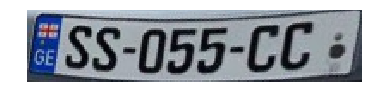

['ge']
[1]
['SS055CC']
images/inx960x640.jpg


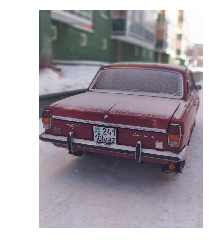

[[[285.08654742 611.75721229]
  [411.94255635 622.32854636]
  [413.14440398 719.67820478]
  [282.9288371  691.59249428]]]


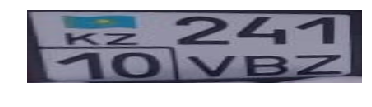

['kz']
[2]
['G3E']
images/example2.jpeg


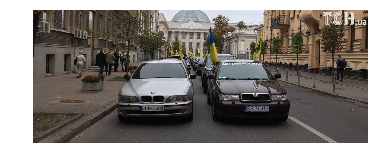

[[[526.70916711 379.94204426]
  [528.88562215 401.70659459]
  [426.05820226 403.02489484]
  [424.71512766 381.53570113]]

 [[948.         376.9375    ]
  [948.         404.        ]
  [843.         404.        ]
  [843.         380.21875   ]]]


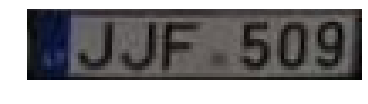

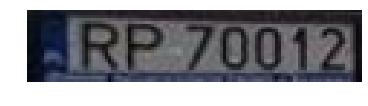

['eu', 'eu']
[1, 1]
['JJE509', 'RP70012']
images/39274725-39274725_5.jpg


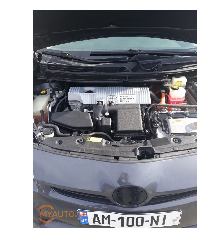

[[[603.         833.        ]
  [603.         900.94382022]
  [193.37599019 893.27295862]
  [190.91586943 833.        ]]]


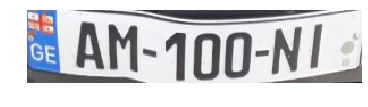

['ge']
[1]
['AM100NI']
images/39223565-39223565_1.jpg


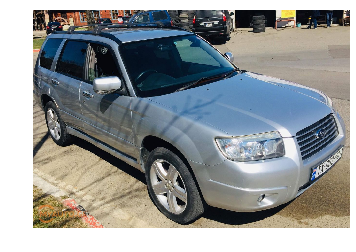

[[[1148.80333656  661.45925994]
  [1288.62806872  548.85704201]
  [1273.51695034  609.3015155 ]
  [1143.1541764   719.08069356]]]


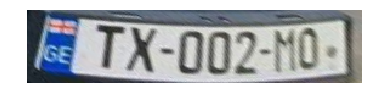

['ge']
[1]
['TX002MO']
images/89898393-38-full.jpg


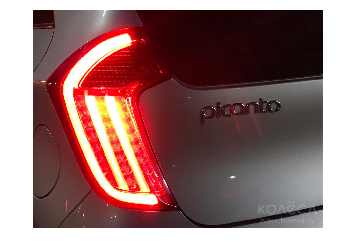

[]
[]
[]
[]
images/39197303-39197303_5.jpg


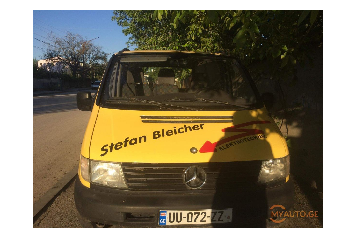

[[[524.86329929 823.34777751]
  [743.17119318 825.04008677]
  [734.4464281  885.02284665]
  [515.42388272 888.24376643]]]


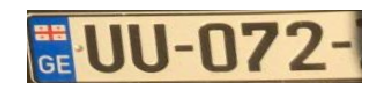

['ge']
[1]
['UU072']
images/39241123-39241123_3.jpg


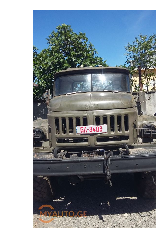

[[[305.92284425 472.76606828]
  [309.26032824 505.02841348]
  [178.15695056 511.52940741]
  [176.00173974 478.1236396 ]]]


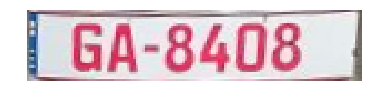

['ge']
[1]
['GA8408']
images/20717578-39-full.jpg


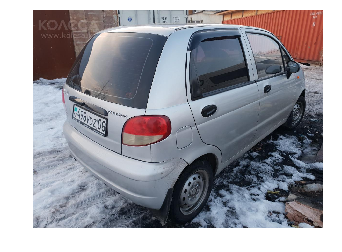

[[[167.88760018 388.00023825]
  [308.73849713 454.66249483]
  [303.03411947 518.55152463]
  [161.0311584  440.56629191]]]


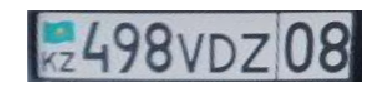

['kz']
[1]
['498VDZ08']
images/86029831-18-full.jpg


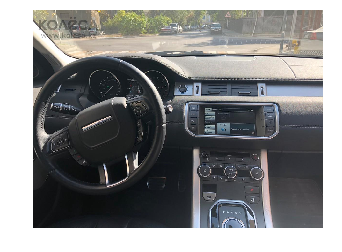

[]
[]
[]
[]
images/90990223-5-full.jpg


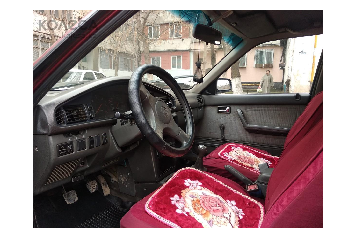

[]
[]
[]
[]
images/38915151-38915151_5.jpg


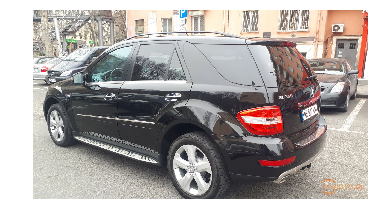

[[[ 111.          328.83333333]
  [ 111.          343.15      ]
  [  71.33683818  341.16684191]
  [  69.73593377  321.95598896]]

 [[1358.19010285  441.10299727]
  [1364.25215452  494.44905201]
  [1283.14778143  530.13497617]
  [1274.57049024  478.67122902]]]


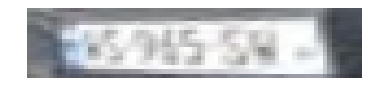

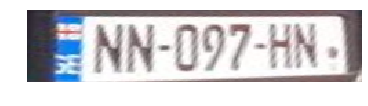

['xx_unknown', 'ge']
[1, 1]
['', 'NN097HN']
images/88736840-10-full.jpg


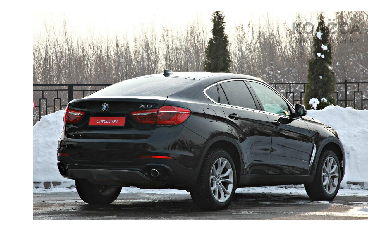

[[[222.94559903 384.97494633]
  [312.06920464 386.06181957]
  [310.86843558 404.07335544]
  [219.35470154 402.92943377]]]


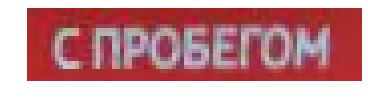

['xx_unknown']
[0]
['']
images/90209801-13-full.jpg


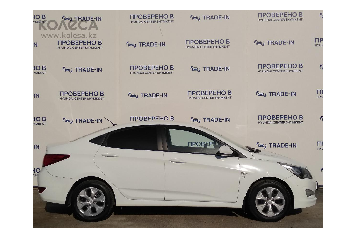

[[[ 636.95553932  331.05154103]
  [ 824.95654099  326.31201997]
  [ 823.86385203  358.        ]
  [ 635.87760096  358.        ]]

 [[ 928.          218.38461538]
  [1118.          216.2967033 ]
  [1118.          252.81052632]
  [ 928.          246.81052632]]

 [[ 400.10166521  223.        ]
  [ 582.86478618  223.        ]
  [ 580.66015613  253.86482077]
  [ 398.92677278  257.07188048]]

 [[ 293.89486117  329.31155332]
  [ 295.19936603  361.92417472]
  [ 112.          359.52941176]
  [ 112.          331.40229885]]

 [[ 399.          429.48543689]
  [ 585.          433.09708738]
  [ 585.          459.93865031]
  [ 399.          463.36196319]]]


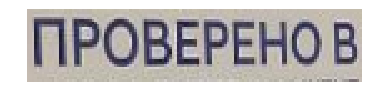

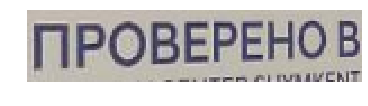

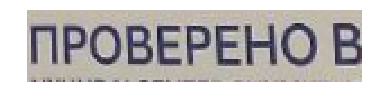

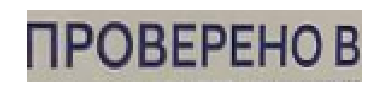

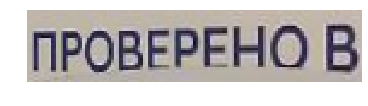

['kz', 'xx_unknown', 'xx_unknown', 'xx_unknown', 'xx_unknown']
[1, 0, 0, 0, 0]
['7PO8PEH0', '', '', '', '']
images/39058136-39058136_6.jpg


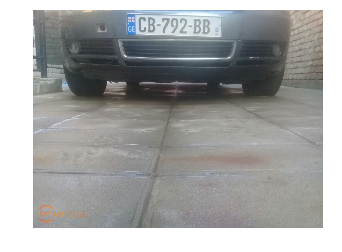

[[[782.63967811  30.5114175 ]
  [774.51304582 109.45584546]
  [378.90381346 100.66452919]
  [387.52428631  16.92279292]]]


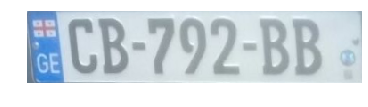

['ge']
[1]
['CB792BB']
images/91023095-5-full.jpg


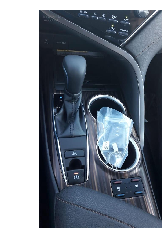

[]
[]
[]
[]
images/example1.jpeg


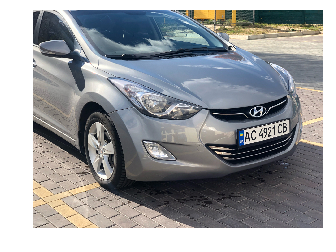

[[[ 872.          508.05882353]
  [1087.13941821  453.21936399]
  [1085.99178999  517.4865439 ]
  [ 872.          578.30526316]]]


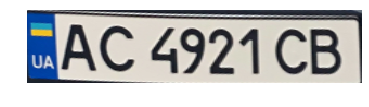

['eu_ua_2015']
[1]
['AC4921CB']
images/90722121-1-full.jpg


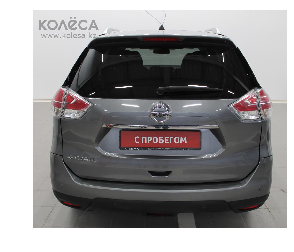

[[[359.         500.05362776]
  [686.98624409 502.1229416 ]
  [688.0322682  566.97643645]
  [359.         568.26171875]]]


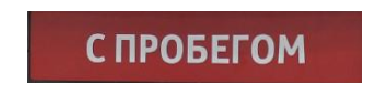

['xx_unknown']
[0]
['']
images/39269928-39269928_3.jpg


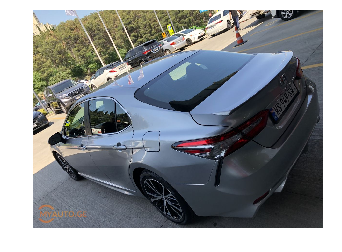

[[[1074.32722646  291.34096692]
  [1127.72856929  291.34096692]
  [1011.48739496  458.        ]
  [ 941.          458.        ]]]


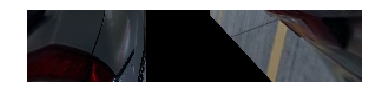

['xx_unknown']
[0]
['']
images/91071838-48-full.jpg


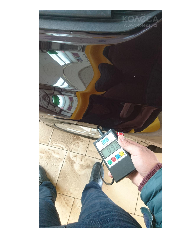

[[[ 569.61144196  956.97453693]
  [ 597.37580133  990.7746266 ]
  [ 479.22923153 1085.04050675]
  [ 441.17133284 1038.70915183]]]


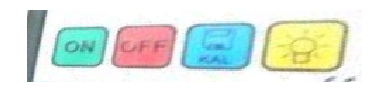

['xx_unknown']
[0]
['']
images/90138655-4-full.jpg


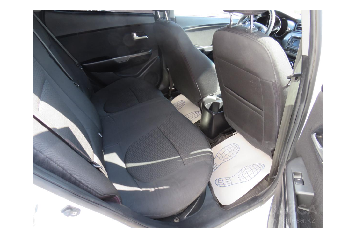

[]
[]
[]
[]
images/241458051.jpg


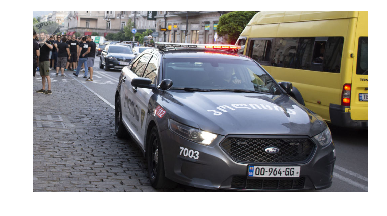

[[[642.43961346 461.95176186]
  [798.30902723 463.09786049]
  [795.77665025 496.01876115]
  [635.22475957 494.93395108]]]


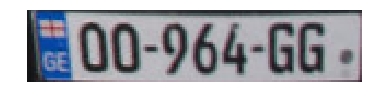

['ge']
[1]
['OO964GG']
images/38520198-6-full.jpg


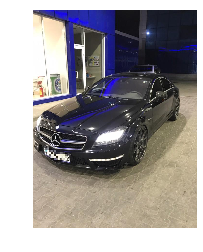

[[[277. 187.]
  [277. 232.]
  [223. 232.]
  [223. 187.]]]


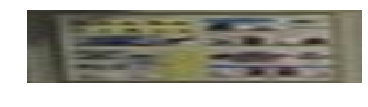

['xx_unknown']
[0]
['']
images/91292437-9-full.jpg


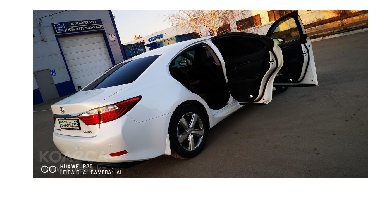

[[[161.09168271 393.04756435]
  [169.47996092 428.99732812]
  [ 94.69642919 419.02619056]
  [ 88.44343885 391.92989906]]]


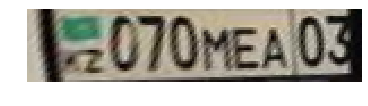

['kz']
[1]
['070MEA03']
images/38969620-38969620_1.jpg


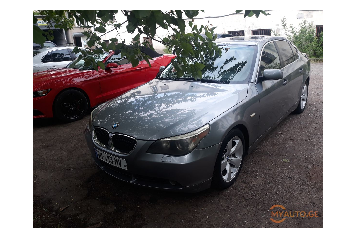

[[[386.36170047 620.35833268]
  [398.97450605 668.51631763]
  [256.1598018  605.54290473]
  [243.65817071 564.46611686]]]


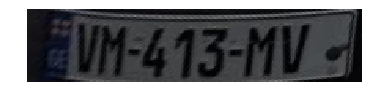

['ge']
[1]
['VM413MV']
images/250030939.jpeg


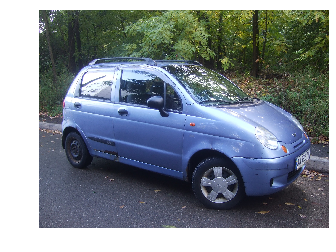

[[[1412.94959551  821.86058427]
  [1501.95247313  753.58440417]
  [1495.29120588  811.31538706]
  [1409.66116495  883.24462145]]]


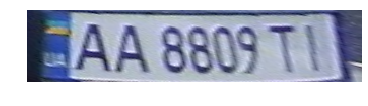

['eu_ua_2015']
[1]
['AA8809TI']


In [3]:
# Walking through the ./examples/images/ directory and checking each of the images for license plates.
rootDir = 'images/'

max_img_w = 1600
for dirName, subdirList, fileList in os.walk(rootDir):
    for fname in fileList:
        img_path = os.path.join(dirName, fname)
        print(img_path)
        img = mpimg.imread(img_path)
        plt.axis("off")
        plt.imshow(img)
        plt.show()
         
        # corect size for better speed
        img_w = img.shape[1]
        img_h = img.shape[0]
        img_w_r = 1
        img_h_r = 1
        if img_w > max_img_w:
            resized_img = cv2.resize(img, (max_img_w, int(max_img_w/img_w*img_h)))
            img_w_r = img_w/max_img_w
            img_h_r = img_h/(max_img_w/img_w*img_h)
        else:
            resized_img = img

        NP = nnet.detect([resized_img]) 
        
        # Generate image mask.
        cv_img_masks = await filters.cv_img_mask_async(NP)
            
        # Detect points.
        arrPoints = await rectDetector.detectAsync(cv_img_masks, outboundHeightOffset=0, fixGeometry=True, fixRectangleAngle=10)
        print(arrPoints)
        arrPoints[..., 1:2] = arrPoints[..., 1:2]*img_h_r
        arrPoints[..., 0:1] = arrPoints[..., 0:1]*img_w_r
        
        # cut zones
        zones = await rectDetector.get_cv_zonesBGR_async(img, arrPoints)
        toShowZones = await rectDetector.get_cv_zonesRGB_async(img, arrPoints)
        for zone, points in zip(toShowZones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()
    
        # find standart
        regionIds, stateIds, countLines = optionsDetector.predict(zones)
        regionNames = optionsDetector.getRegionLabels(regionIds)
        print(regionNames)
        print(countLines)

        # find text with postprocessing by standart  
        textArr = textDetector.predict(zones, regionNames, countLines)
        textArr = await textPostprocessingAsync(textArr, regionNames)
        print(textArr)